In [1]:
from src.data_loader import UCF101_Dataset_Loader
from src.training import DEVICE, Mixed_Precision_Single_Core_Trainer
from src.model_architectures import VGG3D
from src.utils import plot_metrics

import torch
import numpy as np

from tqdm import tqdm

In [2]:
torch.backends.cuda.max_split_size = 512

In [3]:
ucf_data_dir = "data/UCF101/"
ucf_label_dir = "data/ucfTrainTestlist/"
frames_per_clip = 16
step_between_clips = 1

height = 64
width = 64

batch_size = 64

In [4]:
ucf101 = UCF101_Dataset_Loader(ucf_data_dir, ucf_label_dir, frames_per_clip, step_between_clips, height, width, batch_size)

Loading Training Data .........


100%|██████████| 85/85 [00:22<00:00,  3.82it/s]


Loading Testing Data .........


100%|██████████| 85/85 [00:22<00:00,  3.79it/s]



Total number of train samples: 6633
Total number of test samples: 2532
Total number of (train) batches: 104
Total number of (test) batches: 40


Total Number of Classes: 10


### Model Training

In [5]:
torch.manual_seed(69)
vgg_model = VGG3D((frames_per_clip, height, width), len(ucf101.classes)).to(device=DEVICE)
vgg_model

VGG3D(
  (max_pool): MaxPool3d(kernel_size=3, stride=2, padding=(1, 1, 1), dilation=1, ceil_mode=False)
  (conv1): Conv3d(3, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 0, 0))
  (conv2): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 2, 2))
  (conv3): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv4): Conv3d(128, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv5): Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv6): Conv3d(256, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv7): Conv3d(256, 512, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 4, 4))
  (conv8): Conv3d(512, 512, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv9): Conv3d(512, 512, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 4, 4))
  (conv10): Conv3d(512, 512, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (linear1): Linear(i

In [6]:
EPOCHS = 10
optimizer = torch.optim.Adam(vgg_model.parameters(), lr=5e-6)
mp_trainer = Mixed_Precision_Single_Core_Trainer(len(ucf101.classes))

In [7]:
output_metrics = mp_trainer.training_loop(vgg_model,ucf101.train_loader,ucf101.test_loader,EPOCHS, optimizer)

100%|██████████| 40/40 [02:49<00:00,  4.25s/it]


For Epoch 1 We Train Loss:2.27913668522468, Test Loss:2.318302112817764, Train Accuracy:0.1011217962950468, Test Accuracy:0.10055555701255799


100%|██████████| 40/40 [02:47<00:00,  4.18s/it]


For Epoch 2 We Train Loss:2.096132973065743, Test Loss:2.215733176469803, Train Accuracy:0.2487295871027387, Test Accuracy:0.24053560383617878


100%|██████████| 40/40 [03:24<00:00,  5.12s/it]


For Epoch 3 We Train Loss:1.8780100838496134, Test Loss:2.168600744009018, Train Accuracy:0.4841077711719733, Test Accuracy:0.2983333446085453


100%|██████████| 40/40 [03:07<00:00,  4.68s/it]


For Epoch 4 We Train Loss:1.8552052963238497, Test Loss:2.1708906054496766, Train Accuracy:0.49016303196549416, Test Accuracy:0.29502778835594656


100%|██████████| 40/40 [04:08<00:00,  6.21s/it]


For Epoch 5 We Train Loss:1.8320197210862086, Test Loss:2.128191703557968, Train Accuracy:0.5150699337514547, Test Accuracy:0.3817466966807842


100%|██████████| 40/40 [02:55<00:00,  4.38s/it]


For Epoch 6 We Train Loss:1.8129875843341534, Test Loss:2.139457476139069, Train Accuracy:0.5371409895328375, Test Accuracy:0.35319543704390527


100%|██████████| 40/40 [03:00<00:00,  4.52s/it]


For Epoch 7 We Train Loss:1.811753001350623, Test Loss:2.1072768032550813, Train Accuracy:0.5419425325324903, Test Accuracy:0.3966666728258133


100%|██████████| 40/40 [03:28<00:00,  5.22s/it]


For Epoch 8 We Train Loss:1.8090701355383947, Test Loss:2.1219976484775542, Train Accuracy:0.5399108024743887, Test Accuracy:0.3903464384377003


100%|██████████| 40/40 [02:57<00:00,  4.44s/it]


For Epoch 9 We Train Loss:1.8076172471046448, Test Loss:2.1189224064350127, Train Accuracy:0.5426911356357428, Test Accuracy:0.3748455449938774


100%|██████████| 40/40 [02:48<00:00,  4.22s/it]

For Epoch 10 We Train Loss:1.806196467234538, Test Loss:2.1069347143173216, Train Accuracy:0.5461917536763045, Test Accuracy:0.39285039380192754


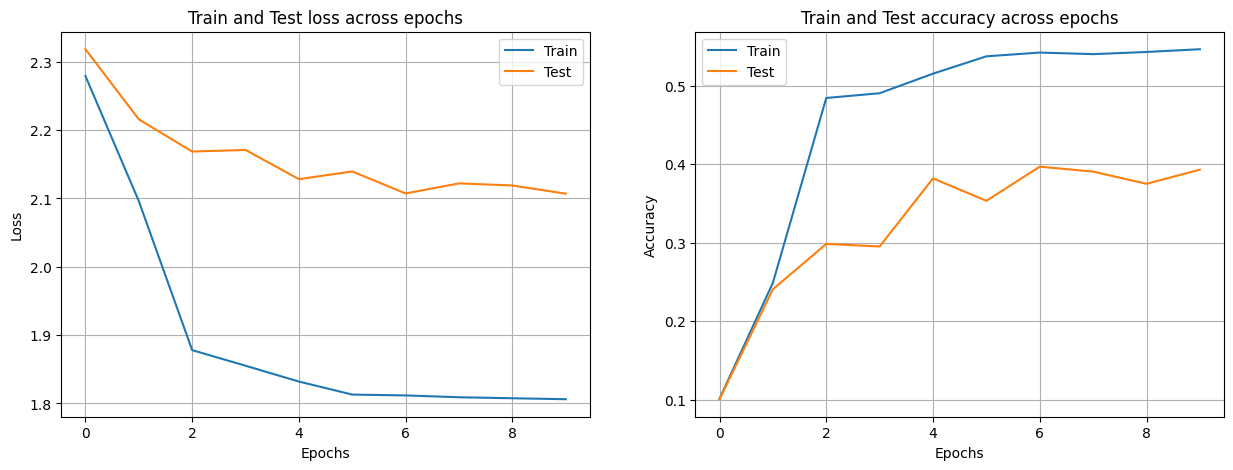

In [8]:
plot_metrics(EPOCHS, output_metrics)

In [9]:
torch.save(vgg_model.state_dict(), 'models/vgg_base_data.pth')